In [21]:
import pandas as pd
from rdkit.Chem import AllChem
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting top rules from generalized rules
---
## Generating reaction-mapping frequency data

In [22]:
headers = ['rule', 'source', 'SMARTS', 'Map']
rule_df = pd.read_csv('metacyc_mapped.tsv', delimiter='\t', names=headers, usecols=['rule'])

rule_df.rule = rule_df.rule.map(lambda s: s.split('_')[0])
rule_counts = rule_df.value_counts().rename_axis('rule').reset_index(name='counts')

rule_counts['rule_id'] = rule_counts.index
rule_counts['cdf'] = rule_counts['counts'].cumsum()/sum(rule_counts['counts'])

rule_counts

,rule,counts,rule_id,cdf
0,rule0013,4922,0,0.065083
1,rule0012,4919,1,0.130127
2,rule0006,3197,2,0.172401
3,rule0007,3197,3,0.214675
4,rule0002,3158,4,0.256433
...,...,...,...,...
1216,rule0914,2,1216,0.999947
1217,rule0743,1,1217,0.999960
1218,rule0742,1,1218,0.999974
1219,rule0826,1,1219,0.999987


## Visualize CDF

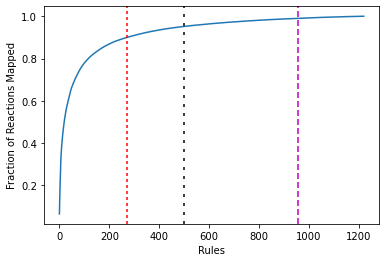

In [23]:
fig, ax = plt.subplots()
sns.lineplot(data=rule_counts, x='rule_id', y='cdf')

ax.set_xlabel('Rules')
ax.set_ylabel('Fraction of Reactions Mapped')

ax.axvline(x=272, c='r', dashes=(2, 2)) #90%
ax.axvline(x=500, c='k', dashes=(2, 4)) #95%
ax.axvline(x=955, c='m', dashes=(4, 2)) #99%

## Select top N rules directly of through % rules mapped
---
### Select number of rules and see how many percent it maps

In [29]:
# Get the frequency, PDF and CDF for each value in the series
n_rules = 30
p_mapped = round(rule_counts.iloc[n_rules]['cdf'], 3)*100
print(f"{n_rules} rules map {p_mapped}%")
chosen_gen_rules = list(rule_counts.iloc[0:n_rules]['rule'])
pat = "|".join(chosen_gen_rules)

30 rules map 57.49999999999999%


### Select a percent of rules to map and calculate number of rules

In [9]:
# fraction mapped, [0, 1]
f_mapped = 0.39
p_mapped = f_mapped*100
n_rules = rule_counts['cdf'].sub(f_mapped).abs().idxmin() + 1
print(f"~{f_mapped*100} percent is mapped by {n_rules} rules")
chosen_gen_rules = list(rule_counts.iloc[0:n_rules]['rule'])
pat = "|".join(chosen_gen_rules)

~39.0 percent is mapped by 10 rules


# Write Generalized Rules

In [30]:
int_rule_df = pd.read_csv('metacyc_generalized_rules.tsv', delimiter='\t')
csv_name = f"metacyc_{int(p_mapped)}p_{n_rules}rules_gen.tsv"
new_rules = int_rule_df[int_rule_df['Name'].str.contains(pat)]
new_rules.to_csv(csv_name, sep='\t')

---
---

# Select intermediate rules that correspond to top generalized rules chosen above
---
# Load Data

In [25]:
int_rule_df = pd.read_csv('metacyc_intermediate_rules.tsv', delimiter='\t')

# Select and write intermediate rules

In [31]:
csv_name = f"metacyc_{int(p_mapped)}p_{n_rules}rules_gen_to_intermediate.tsv"
new_rules = int_rule_df[int_rule_df['Name'].str.contains(pat)]
new_rules.to_csv(csv_name, sep='\t', index=False)

In [61]:
rule_counts

,rule,counts,rule_id,cdf
0,rule0013,4922,0,0.065083
1,rule0012,4919,1,0.130127
2,rule0006,3197,2,0.172401
3,rule0007,3197,3,0.214675
4,rule0002,3158,4,0.256433
...,...,...,...,...
1216,rule0914,2,1216,0.999947
1217,rule0743,1,1217,0.999960
1218,rule0742,1,1218,0.999974
1219,rule0826,1,1219,0.999987
